train.....
斜率：0.9028174640902874，截距：14.862147999269474
模型的残差标准差为：[3.12199943]
预测结果为：[15.76, 16.67, 17.57, 18.47, 19.38, 20.28]


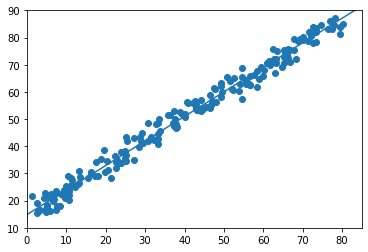

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#创建数据集
def create_data():
    w=0.9
    b=15
    x=np.random.uniform(0.0, 80.0, (200, 1)) #200行1列的0-80的浮点数
    y=w*x+b
    # 对数据进行标准正态分布处理
    #normal(loc=0.0, scale=1.0, size=None) loc表示正太分布的中心, scale表示正太分布的标准差
    x = np.random.normal(x, 2)
    y = np.random.normal(y, 2)
    
    return x, y 

    
#创建模型
def build_model():
    model=np.array([0,0],dtype=float)
    
    return model


#定义训练函数
def train_math(model,xtr,ytr):
    print('train.....')
    x_mean=np.mean(xtr)
    y_mean=np.mean(ytr)
    num1=0.0 #分子
    num2=0.0 #分母

    for x_i,y_i in zip(xtr,ytr):
        num1+=(x_i-x_mean)*(y_i-y_mean)
        num2+=(x_i-x_mean)**2
    
    w = num1/num2
    b = y_mean - w*x_mean
    model[0]=w
    model[1]=b
    print("斜率：{}，截距：{}".format(model[0],model[1]))
    
    pass


#定义测试函数
def test_math(model,xte,yte):
    err=0.0
    
    for x_i, y_i in zip(xte, yte):
        y_i1 = model[0]*x_i+model[1]
        err += (y_i-y_i1)**2
    res=np.sqrt(err/len(yte))
    
    print("模型的残差标准差为：{}".format(res))
    
    pass


#预测
def predict_math(model,xkno):
    ypre=[]
    
    for x in xkno:
        ypre.append(round(x*model[0]+model[1],2))

    return ypre
    pass

 

if __name__ == '__main__':
    #创建数据集
    x_data,y_data=create_data()
    plt.xlim(0,85)
    plt.ylim(10,90)
    plt.scatter(x_data,y_data)

    #分割数据集 :得到训练数据集和测试数据集
    x_train = x_data[:160]
    y_train = y_data[:160]
    x_test = x_data[160:]
    y_test = y_data[160:]

    #创建模型
    model=build_model()
    
    #训练数据
    train_math(model,x_train,y_train)
    plt.plot([0,85],[0*model[0]+model[1], 85*model[0]+model[1]])

    #调用测试函数
    test_math(model, x_test, y_test)

    #预测
    xkno = [1,2,3,4,5,6]
    yresult = predict_math(model,xkno)
    print("预测结果为：{}".format(yresult))
    plt.show()

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068890
Loss after iteration 3000: 0.071218
Loss after iteration 4000: 0.071253
Loss after iteration 5000: 0.071278
Loss after iteration 6000: 0.071293
Loss after iteration 7000: 0.071303
Loss after iteration 8000: 0.071308
Loss after iteration 9000: 0.071312
Loss after iteration 10000: 0.071314
Loss after iteration 11000: 0.071315
Loss after iteration 12000: 0.071315
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


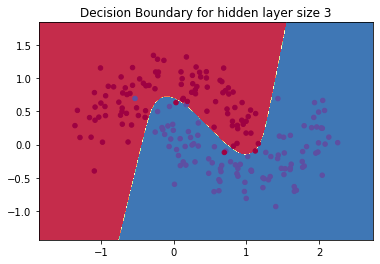

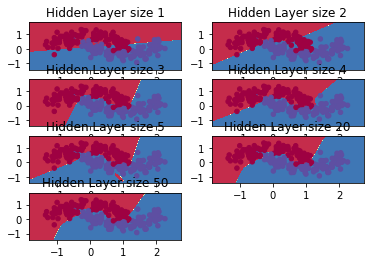

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets
import matplotlib 


def generate_data(): # 产生数据集
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20) # 产生月牙形状的数据集

    return X, y
 

def plot_decision_boundary(pred_func, X, y): # 画决策边界线
    # 设置图像边界最大值与最小值
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01 #采样间隔

    # 生成网格矩阵
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 对整个网格矩阵进行预测
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) # 使预测结果重新变成网格数组大小

    # 画出决策边界
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)

    # 画出数据点
    plt.scatter(X[:, 0], X[:, 1], s = 20,c=y, cmap=plt.cm.Spectral) 


def calculate_loss(X, y, param, reg_lambda, num_examples): # 计算损失
    #获得参数
    theta1, b1, theta2, b2 = param['theta1'], param['b1'], param['theta2'], param['b2'] 

    #前向传播
    z1 = X.dot(theta1) + b1 
    a1 = np.tanh(z1) 
    z2 = a1.dot(theta2) + b2 
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 

    # 计算损失
    corect_logprobs = -np.log(probs[range(num_examples), y]) 
    data_loss = np.sum(corect_logprobs) 

    # 正则化（防止过拟合）
    data_loss += reg_lambda/2 * (np.sum(np.square(theta1)) + np.sum(np.square(theta2))) 
    return 1./num_examples * data_loss 
 

def predict(param, x): # 预测结果
    theta1, b1, theta2, b2 = param['theta1'], param['b1'], param['theta2'], param['b2'] 
    
    # 前向传播 
    z1 = x.dot(theta1) + b1 
    a1 = np.tanh(z1) 
    z2 = a1.dot(theta2) + b2 
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) #按行相加，保证矩阵的二维特性

    return np.argmax(probs, axis=1) #表示返回行上最大值得索引值


def build_model(X, y, nn_input_dim, nn_hdim, nn_output_dim, alpha, reg_lambda, num_passes=20000, print_loss=False): # 模型建立
    # - nn_input_dim: 输入层维度
    # - nn_hdim: 隐藏层维度
    # - nn_output_dim: 输出层维度
    # - alpha: 学习速率
    # - reg_lambda: 正则化参数lanmda
    # - num_passes: 学习代数
    # - print_loss: 是否打印每一代的损失
    num_examples = len(X) # 数据集个数

    # 初始化参数
    np.random.seed(0) 
    theta1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim) 
    b1 = np.zeros((1, nn_hdim)) 
    theta2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) 
    b2 = np.zeros((1, nn_output_dim)) 

    # 参数字典
    param = {} 
    loss_list = []

    # 梯度下降 
    for i in range(0, num_passes): 
        # 前向传播 
        z1 = X.dot(theta1) + b1 
        a1 = np.tanh(z1) 
        z2 = a1.dot(theta2) + b2 
        exp_scores = np.exp(z2) 
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 

        # 反向传播 
        delta3 = probs 
        delta3[range(num_examples), y] -= 1 
        dtheta2 = (a1.T).dot(delta3) 
        db2 = np.sum(delta3, axis=0, keepdims=True) 
        delta2 = delta3.dot(theta2.T) * (1 - np.power(a1, 2)) 
        dtheta1 = np.dot(X.T, delta2) 
        db1 = np.sum(delta2, axis=0) 

        # 加入正则化
        dtheta2 += reg_lambda * theta2 
        dtheta1 += reg_lambda * theta1 
        
        # 梯度下降参数更新
        theta1 += -alpha * dtheta1 
        b1 += -alpha * db1 
        theta2 += -alpha * dtheta2 
        b2 += -alpha * db2  
        param = { 'theta1': theta1, 'b1': b1, 'theta2': theta2, 'b2': b2} 

        # 每隔1000代打印损失
        #loss list.append(calculate_loss(X,y,param,reg_lambda,num_examples))
        if print_loss and i % 1000 == 0: 
            print("Loss after iteration %i: %f" %(i, calculate_loss(X,y,param,reg_lambda,num_examples)))    

    return param,loss_list


def main():
    X, y = generate_data()
    nn_input_dim = 2 # 输入层维度 
    nn_output_dim = 2 # 输出层维度
    alpha = 0.01 # 梯度下降学习速率 
    reg_lambda = 0.01 # 正则化参数
    param, loss_list = build_model(X, y, 2, 3, 2, alpha, reg_lambda, print_loss=True)

    # 画出决策边界
    plot_decision_boundary(lambda x: predict(param, x),X,y) 
    plt.title("Decision Boundary for hidden layer size 3") 

    #plt.figure(3)
    #plt.plot(range(0,len(loss_list)),loss_list)
    # 改变隐藏层维度
    plt.figure(2)
    hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50] 
    for i, nn_hdim in enumerate(hidden_layer_dimensions):  
        plt.subplot(4, 2, i+1) 
        plt.title('Hidden Layer size %d' % nn_hdim) 
        param, loss_list = build_model(X,y,2,nn_hdim,2,alpha,reg_lambda) 
        plot_decision_boundary(lambda x: predict(param, x),X,y)
    plt.show()

if __name__ == '__main__':
    main()